## Buffon’s Needle (estimate π)

---

**Goal：**
Simulate dropping a needle of length L on parallel lines distance D apart (L ≤ D) and estimate π.

- Simulate N independent drops; compute crossing probability pˆ.
- Use formula p = 2L/(pi*D) to solve for πˆ.
- Vary N ∈ {10^3, 10^4, 10^5}; plot πˆ vs N with horizontal line at π.
- Report absolute error and binomial confidence interval for p propagated to π.

**My main ideas:**<br>
- to simplify the problem, first we need to set a constant L and a constant D. I will set L=1 and D=2.<br>
- I will set the whole area formed by parallel lines to be a 10*10 square. In the first quadrant of the coordinate system.<br>
- Thus, the parallel lines can be set as: y=0, y=2, y=4, y=6, y=8, y=10.<br>
- Next, we need to set the needles. I will define the starting point of a needle as a cooridinate: (x_i,y_i). in which x_i and y_i are random floats generated by numpy.<br>
- to make sure the needle won't fall outside the 10*10 square, x_i and y_i should be inside the interval [1,9]. because the length of needles is L=1 here.<br>
- Then we need to define the ending point of the needle, and what "crossing" means.
- I will set another random variable: θ. <br>
The definition for θ: The ray along the positive x-axis will coincide with the line segment "needle" after rotating counterclockwise by the angle θ. <br>
Thus, θ can range [0,2π]. (I'm using radians here, not degrees.)<br>
- I set this to make sure I can compute the coordinate of the ending point as: 
(x_i+Lcosθ, y_i+Lsinθ).<br>
- in which L=1, so the coordinate of the ending point is simply (x_i+cosθ, y_i+sinθ).<br>
- Through this setting, we can make sure that wherever the starting/ending point of the needle is, the needle will never fall outside the 10*10 square.<br>
- And I define "crossing" as: 0 or 2 or 4 or 6 or 8 or 10 falls inside the interval [y_i,y_i+Lsinθ] or [y_i+Lsinθ,y_i].<br>
- repeat N times and compute crossing probability pˆ=counter/N. (whenever there's a crossing, counter=counter+1)
- then, using p = 2L/(pi* D), we have pi^=2L/(p*D). in my case, 2L=D=2, so pi^=1/p.




In [6]:
# preparations
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt  # I prefer this for plots. 
from plotnine import *
warnings.filterwarnings("ignore")

np.random.seed(42)  # but I don't want to set seed in this question

n = 100 , counter = 30 , p_hat = 0.3 , pi_hat = 3.3333333333333335
The plot below is a simulation for dropping 100 needles, in which the blue lines stand for needles, and the brown lines stand for parallel lines.


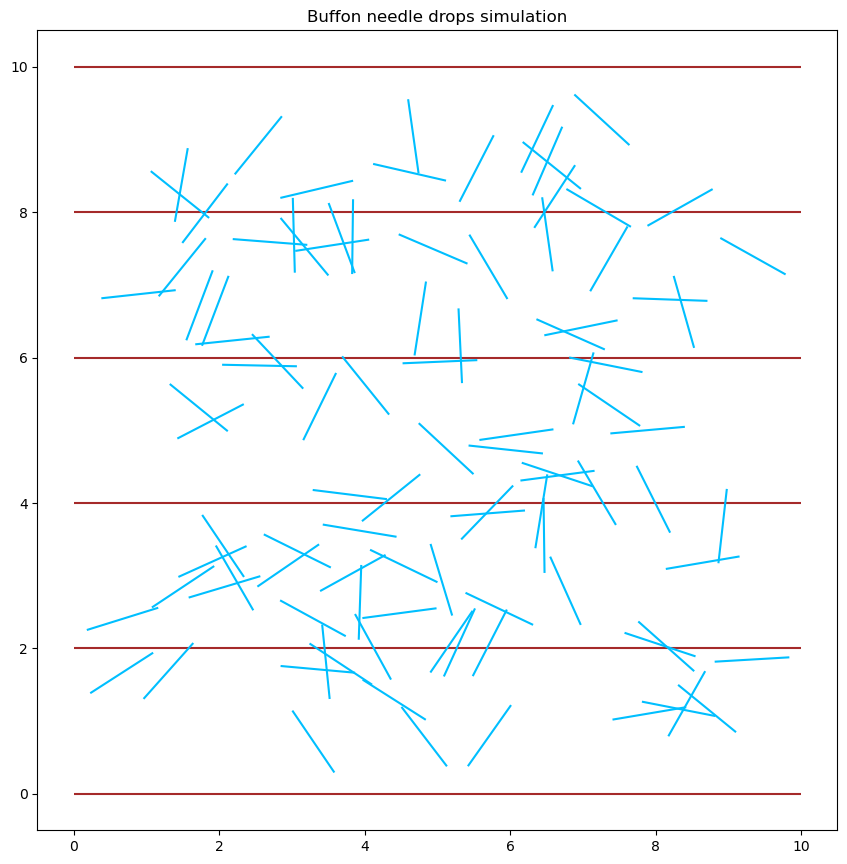

In [27]:
"""
In this cell, I defined a function for needle crossing counter, and plotted Buffon needle drops simulation.
"""

# Preparations for the simulation plot (draw the parallel lines first)

fig = plt.figure(figsize=(10,10))                       # Setting image size=10*6
ax = fig.add_axes([0.1,0.1,0.8,0.8])    
ax.set_title('Buffon needle drops simulation')          # Setting image title
ax.hlines(y =0, xmin = 0, xmax = 10, color='brown')     # parallel line of y=0. here D=2.
ax.hlines(y =2, xmin = 0, xmax = 10, color='brown')     # parallel line of y=2.
ax.hlines(y =4, xmin = 0, xmax = 10, color='brown')     # parallel line of y=4.
ax.hlines(y =6, xmin = 0, xmax = 10, color='brown')     # parallel line of y=6.
ax.hlines(y =8, xmin = 0, xmax = 10, color='brown')     # parallel line of y=8.
ax.hlines(y =10, xmin = 0, xmax = 10, color='brown')    # parallel line of y=10.

def crossing(n):                                        # def a function for "crossing"
    counter=0                                           # counter for counting total crossing times
    xs_list=[]                                          # empty lists for storing all the starting/ending points coordinates of needles,
    ys_list=[]                                          # so that we can draw the needles on the plot
    xe_list=[]                                          # xs:x_start, ys:y_start, xe:x_end, ye:y_end
    ye_list=[]
    for i in range(n):                                  # drop n needles in total
        xs = np.random.uniform(1,9)                     # generate random coordinates for the starting point of the needles
        xs_list.append(xs)
        ys = np.random.uniform(1,9)
        ys_list.append(ys)
        sita=np.random.uniform(0,2*math.pi)             # generate random sita in range [0,2pi]
        xe=xs+math.cos(sita)                            # compute the ending point coordinate through sita
        xe_list.append(xe)
        ye=ys+math.sin(sita)
        ye_list.append(ye)
        ax.plot([xs_list[i], xe_list[i]], [ys_list[i], ye_list[i]], color='deepskyblue')    # draw all needles on the plot
        
        if ys<ye:                                       # I define "crossing" as: 0 or 2 or...or 10 falls inside the interval [y_i,y_i+Lsinθ] or [y_i+Lsinθ,y_i]
            if ((ys<=0)and(ye>=0)) or ((ys<=2)and(ye>=2)) or ((ys<=4)and(ye>=4)) or ((ys<=6)and(ye>=6)) or ((ys<=8)and(ye>=8)) or ((ys<=10)and(ye>=10)) is True:
                counter=counter+1
        else:                                           # it doesn't matter whether the starting point is higher or lower than the ending point.
            if ((ye<=0)and(ys>=0)) or ((ye<=2)and(ys>=2)) or ((ye<=4)and(ys>=4)) or ((ye<=6)and(ys>=6)) or ((ye<=8)and(ys>=8)) or ((ye<=10)and(ys>=10)) is True:
                counter=counter+1

    return counter

        


n=100
count=crossing(n)                                       # try with n=100
print ("n =",n,", counter =",count,", p_hat =",count/n,", pi_hat =",n/count)

print("The plot below is a simulation for dropping 100 needles, in which the blue lines stand for needles, and the brown lines stand for parallel lines.")
plt.show()


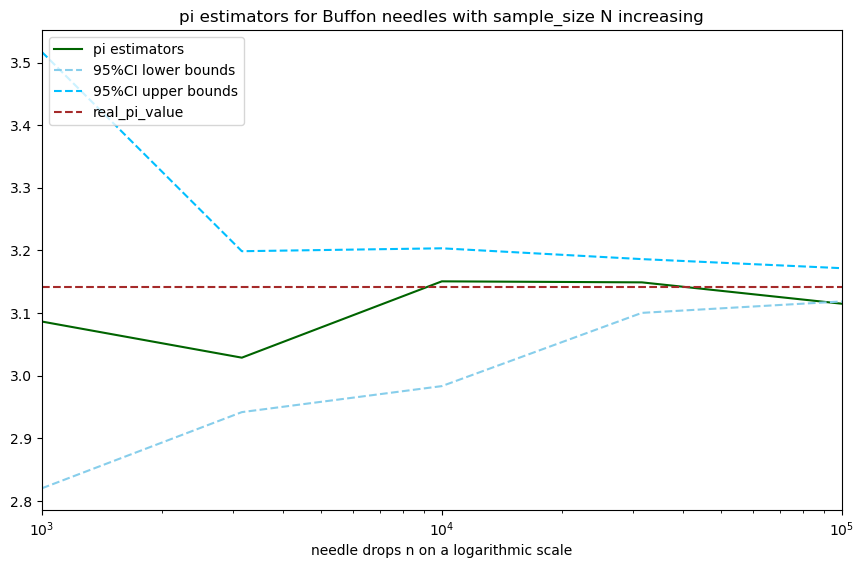

In [8]:
"""
In this cell, I def crossing_times(n) without plotting the needles, calculated the pi estimates and errors, and plotted the pi estimates. 
"""

# in last cell, crossing(n) is defined with drawing the needles, so I have to def another function without plotting here

def crossing_times(n):                              # this function is almost completely the same, except that it doesn't include plotting
    counter=0                     
    for i in range(n):                 
        xs = np.random.uniform(1,9)
        ys = np.random.uniform(1,9)
        sita=np.random.uniform(0,2*math.pi)
        xe=xs+math.cos(sita)
        ye=ys+math.sin(sita)
        if ys<ye:
            if ((ys<=0)and(ye>=0)) or ((ys<=2)and(ye>=2)) or ((ys<=4)and(ye>=4)) or ((ys<=6)and(ye>=6)) or ((ys<=8)and(ye>=8)) or ((ys<=10)and(ye>=10)) is True:
                counter=counter+1
        else:
            if ((ye<=0)and(ys>=0)) or ((ye<=2)and(ys>=2)) or ((ye<=4)and(ys>=4)) or ((ye<=6)and(ys>=6)) or ((ye<=8)and(ys>=8)) or ((ye<=10)and(ys>=10)) is True:
                counter=counter+1

    return counter

def p_hat(n):                           # I want to def everything separately, here's the function for simulated p
    return crossing_times(n)/n

def pi_hat(n):                          # here's the def for pi estimates
    L=1
    D=2
    return 2*L/(p_hat(n)*D)

def error(n):                           # def for absolute errors between pi estimates and real pi value
    return abs(math.pi-pi_hat(n))

def se(n):                              # def se to calculate the 95% CI below
    return math.sqrt(p_hat(n)*(1-p_hat(n))/n)

def lower(n):                           # p 95% CI lower bound
    return p_hat(n)-1.96*se(n)

def upper(n):                           # p 95% CI upper bound
    return p_hat(n)+1.96*se(n)

def pi_lower(n):                        # an interval for pi by 95% CI bounds of p
    return 1/upper(n)

def pi_upper(n):
    return 1/lower(n)

n_list=[10**3,int(10**3.5),10**4,int(10**4.5),10**5]
pi_hat_list=[]                          # The plot's N is on a logarithmic scale, to make it look more even, I did this
error_list=[]
p_list=[]                               # store everything in lists for plotting
lower_list=[]
upper_list=[]
pi_lower_list=[]
pi_upper_list=[]

for n in n_list:
    pi_hat_list.append(pi_hat(n))       # store values in lists for plotting
    error_list.append(error(n))
    p_list.append(p_hat(n))
    lower_list.append(lower(n))
    upper_list.append(upper(n))
    pi_lower_list.append(pi_lower(n))
    pi_upper_list.append(pi_upper(n))



                                        # plot pi estimators
fig = plt.figure(figsize=(10,6))        # Setting image size=10*6
ax = fig.add_axes([0.1,0.1,0.8,0.8])     
ax.set_title('pi estimators for Buffon needles with sample_size N increasing')      # Setting image title
ax.plot(n_list,pi_hat_list,color='darkgreen',label = 'pi estimators')      # plot pi estimators
ax.plot(n_list,pi_lower_list, linestyle = '--',color='skyblue',label = '95%CI lower bounds') 
ax.plot(n_list,pi_upper_list, linestyle = '--',color='deepskyblue',label = '95%CI upper bounds') 
ax.set_xscale('log')                    # n on a logarithmic scale
ax.set_xlim(1e3, 1e5)                   # to hide the empty left part
ax.hlines(y =math.pi, xmin = n_list[0], xmax = n_list[-1], linestyle = '--', color='brown',label = 'real_pi_value')   # horizontal line of real pi value.
ax.set_xlabel("needle drops n on a logarithmic scale")

plt.legend(loc = 'upper left')          # top left legend
plt.show()


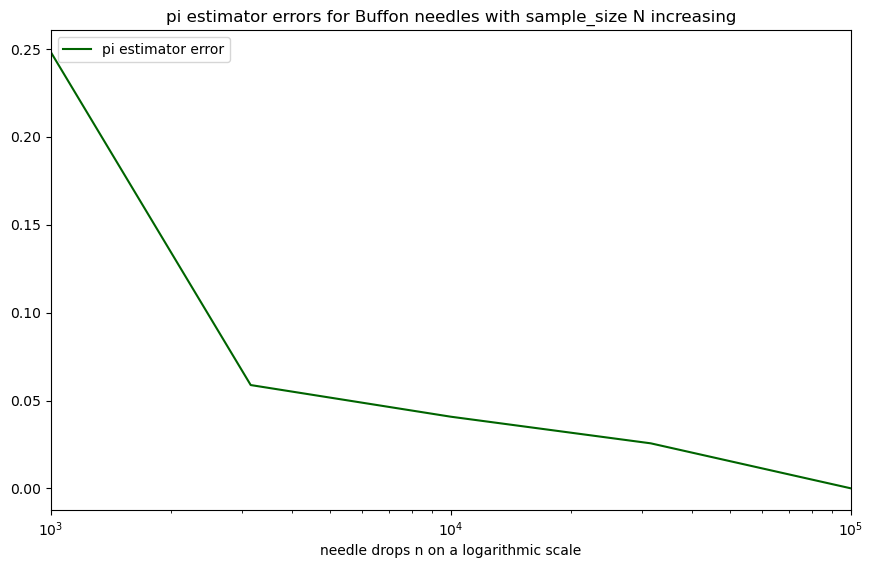

In [9]:
"""
In this cell, I plotted the absolute errors between pi estimates and real pi value.
"""

fig = plt.figure(figsize=(10,6))        # Setting image size=10*6
ax = fig.add_axes([0.1,0.1,0.8,0.8])     
ax.set_title('pi estimator errors for Buffon needles with sample_size N increasing')      # Setting image title
ax.plot(n_list,error_list,color='darkgreen',label = 'pi estimator error')      # plot pi estimator error
ax.set_xscale('log')                    # n on a logarithmic scale
ax.set_xlim(1e3, 1e5)                   # to hide the empty left part

ax.set_xlabel("needle drops n on a logarithmic scale")

plt.legend(loc = 'upper left')          # top left legend
plt.show()

It can be seen from the plot that the absolute error between pi estimates and real pi value converges gradually to 0 with needle drops n increasing.<br>
I know my code is bad, and this jupyter notebook runs extremely slowly, but at least it indeed can get some pi estimates with little error. That's enough for me.

--------------

Now the time for calculating 95% CI.<br>
It's clear that "whether the needle cross a parallel line" follows a bernoulli distribution. Let's set "that the needle cross a parallel line" as event X. Then we have:<br>
$P(X=1)=p=2L/(pi*D),  
P(X=0)=1-p=1-2L/(pi*D)$<br>
Now we already have an estimate for p: sample mean p_hat.<br>
We still need to calculate $se=\sqrt{\hat{p}(1-\hat{p})/n}$<br> 
(This is what I found online, I've forgotten everything except CI for normal distributions)<br>
Thus 95% CI=$[\hat{p}-1.96*\sqrt{\hat{p}(1-\hat{p})/n}, \hat{p}+1.96*\sqrt{\hat{p}(1-\hat{p})/n}]$<br>
I will just add the codes for def se, def lower bound, def upper bound and storing values in lists in the plotting cell.

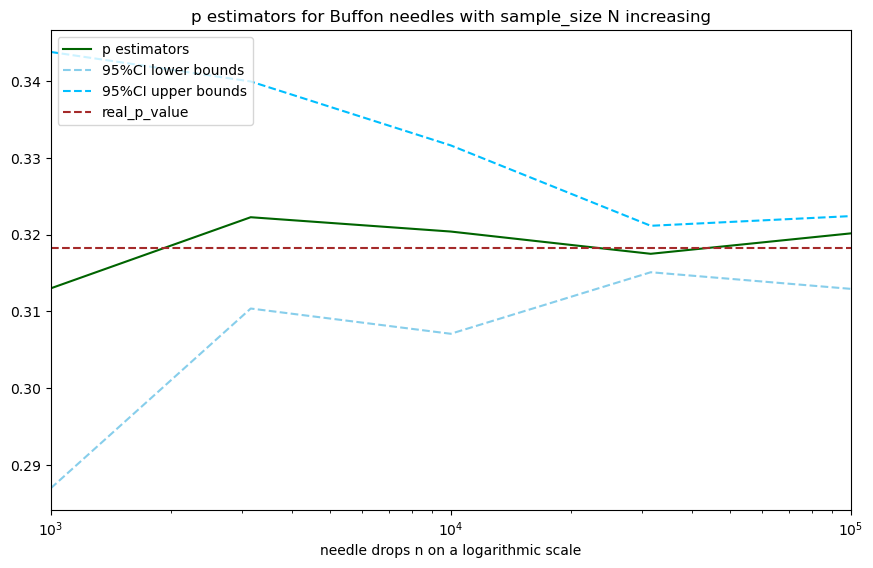

In [10]:
"""
In this cell, I plotted p_hats with n increasing. p_hat should be 1/pi when L=1 and D=2.
"""
# I already wrote the codes for calculating 95% CI upper bounds and lower bounds in the cell above.

fig = plt.figure(figsize=(10,6))        # Setting image size=10*6
ax = fig.add_axes([0.1,0.1,0.8,0.8])     
ax.set_title('p estimators for Buffon needles with sample_size N increasing')      # Setting image title
ax.plot(n_list,p_list,color='darkgreen',label = 'p estimators')      # plot p estimators
ax.plot(n_list,lower_list, linestyle = '--',color='skyblue',label = '95%CI lower bounds') 
ax.plot(n_list,upper_list, linestyle = '--',color='deepskyblue',label = '95%CI upper bounds') 
ax.hlines(y =1/math.pi, xmin = n_list[0], xmax = n_list[-1], linestyle = '--', color='brown',label = 'real_p_value')   # horizontal line of real p value.
ax.set_xscale('log')                    # n on a logarithmic scale
ax.set_xlim(1e3, 1e5)                   # to hide the empty left part
ax.set_xlabel("needle drops n on a logarithmic scale")

plt.legend(loc = 'upper left')          # top left legend
plt.show()